In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install pandas matplotlib seaborn
import pandas as pd



SyntaxError: invalid syntax (1572180370.py, line 1)

In [7]:
import pandas as pd

# Ruta del archivo CSV
file_path = r"C:\Users\GINXT\OneDrive - Bayer\Personal Data\Kat\IA\metadatos_actualizados_limpios_normalizados.csv"

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv(file_path)

# Mostrar las primeras 5 filas del DataFrame
df.head()


,lesion_id,image_id,dx,age,sex,localization,classification,dataset
0,ham_0003577,isic_0024307.jpg,nv,50.0,male,lower extremity,lesión benigna,original
1,ham_0000484,isic_0024309.jpg,nv,40.0,male,trunk,lesión benigna,original
2,ham_0003350,isic_0024310.jpg,mel,60.0,male,chest,lesión maligna,original
3,ham_0001359,isic_0024312.jpg,bkl,75.0,male,lower extremity,lesión benigna,original
4,ham_0002869,isic_0024313.jpg,mel,50.0,female,back,lesión maligna,original


In [8]:
# Mostrar el número de filas y columnas
df.shape


(6021, 8)

In [9]:
# Mostrar los tipos de datos de cada columna
df.dtypes


lesion_id          object
image_id           object
dx                 object
age               float64
sex                object
localization       object
classification     object
dataset            object
dtype: object

In [10]:
# Mostrar la cantidad de valores nulos por columna
df.isnull().sum()


lesion_id         0
image_id          0
dx                0
age               0
sex               0
localization      0
classification    0
dataset           0
dtype: int64

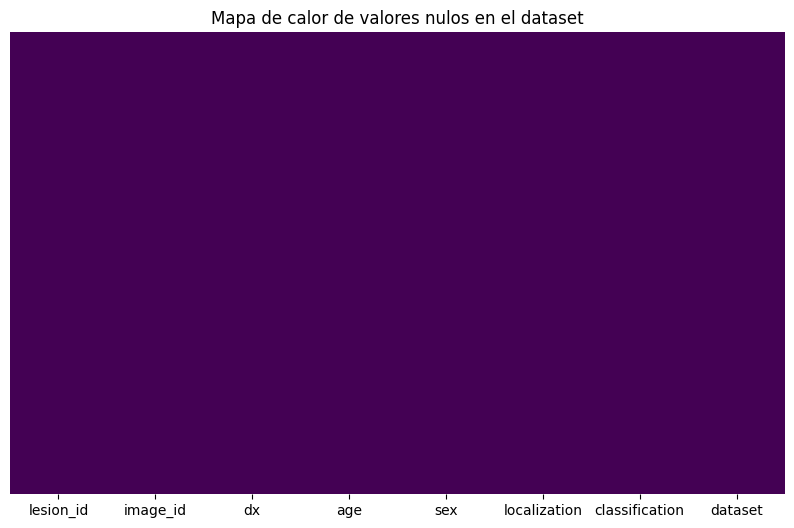

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Crear un gráfico de calor para visualizar los valores nulos
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

# Título del gráfico
plt.title('Mapa de calor de valores nulos en el dataset')

# Mostrar el gráfico
plt.show()


In [12]:
# Definir rangos de edad
bins = [0, 18, 30, 40, 50, 60, 70, 80, 100]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '80+']
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels)

# Calcular la distribución de tipo de lesión por rango de edad
distribution_age_dx = df.groupby(['age_range', 'dx']).size().unstack(fill_value=0)

# Mostrar la tabla de distribución
print(distribution_age_dx)


dx         bcc  bkl  mel   nv  sek
age_range                         
0-18         0    1    1   58    0
19-30       13    6   58  280    1
31-40       68   65   85  535    0
41-50      141  145  179  737    0
51-60      290  224  264  411    9
61-70      360  290  310  231   19
71-80      345  247  176  117   11
80+        137   93   80   16    7


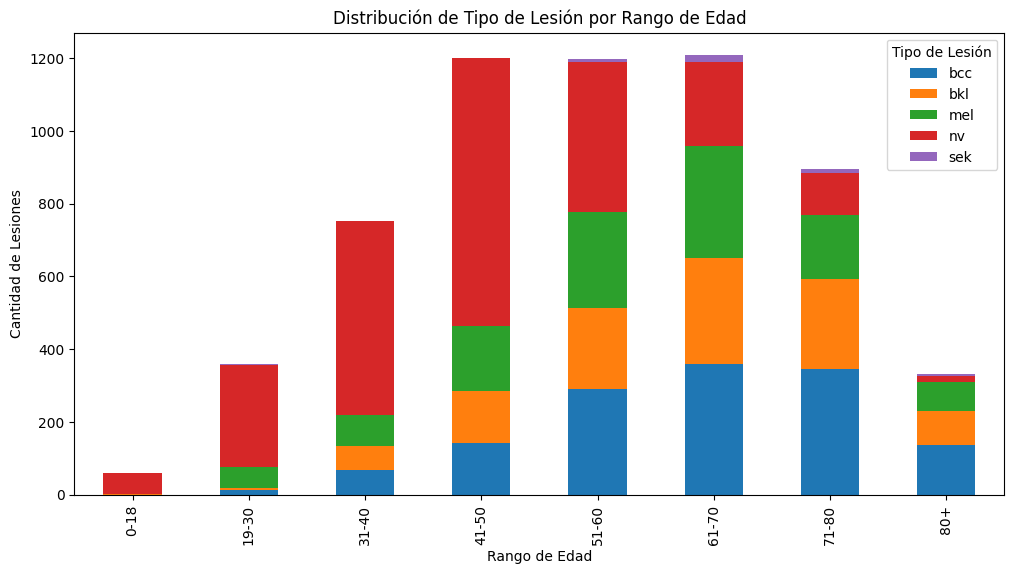

In [13]:
# Visualizar la distribución con un gráfico de barras apiladas
distribution_age_dx.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Distribución de Tipo de Lesión por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Lesiones')
plt.legend(title='Tipo de Lesión')
plt.show()


In [14]:
# Calcular la distribución de tipo de lesión por sexo
distribution_sex_dx = df.groupby(['sex', 'dx']).size().unstack(fill_value=0)

# Mostrar la tabla de distribución
print(distribution_sex_dx)


dx      bcc  bkl  mel    nv  sek
sex                             
female  601  461  451  1161   27
male    753  615  702  1230   20


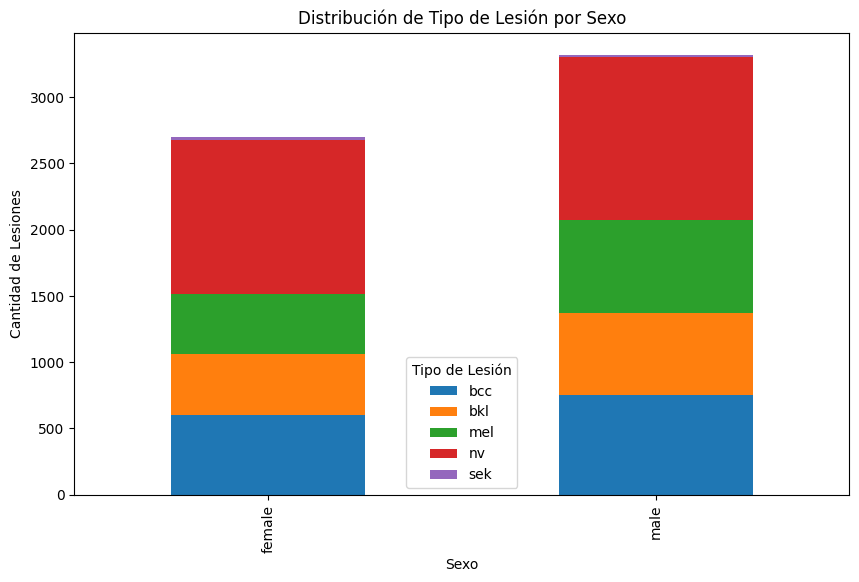

In [15]:
# Visualizar la distribución con un gráfico de barras apiladas
distribution_sex_dx.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribución de Tipo de Lesión por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad de Lesiones')
plt.legend(title='Tipo de Lesión')
plt.show()


In [16]:
# Calcular la distribución para la clasificación benigna y maligna
distribution_classification = df.groupby(['classification', 'dx']).size().unstack(fill_value=0)

# Mostrar la tabla de distribución
print(distribution_classification)


dx               bcc   bkl   mel    nv  sek
classification                             
lesión benigna     0  1076     0  2391   47
lesión maligna  1354     0  1153     0    0


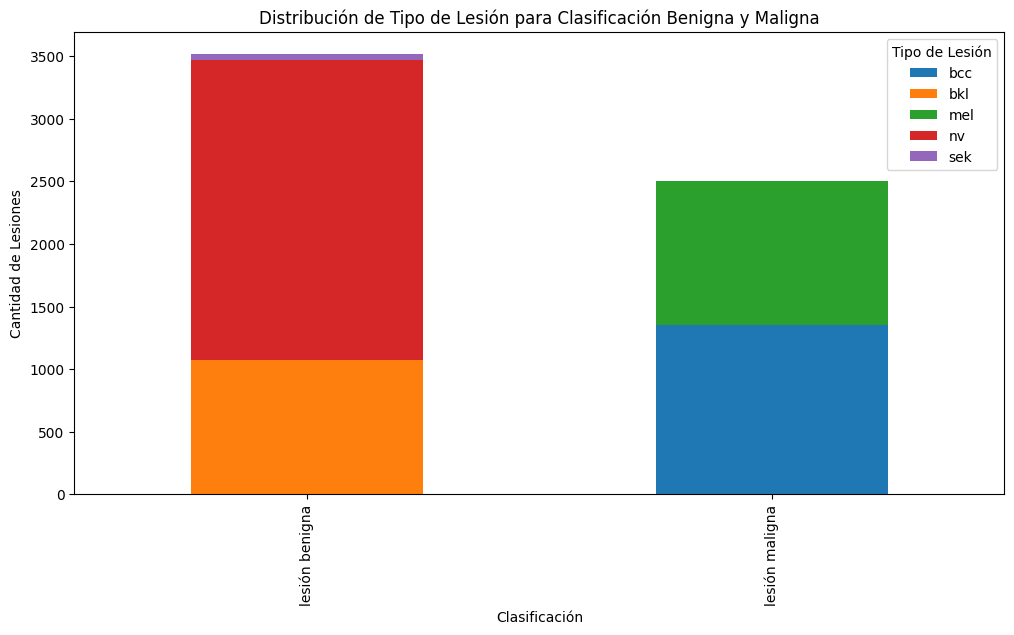

In [17]:
# Visualizar la distribución con un gráfico de barras apiladas
distribution_classification.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Distribución de Tipo de Lesión para Clasificación Benigna y Maligna')
plt.xlabel('Clasificación')
plt.ylabel('Cantidad de Lesiones')
plt.legend(title='Tipo de Lesión')
plt.show()
